In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.style.use('seaborn')

https://www.kitplanes.com/homebuilt-accidents-focus-on-vans/?fbclid=IwAR16rMvKRhAimdUmXEr3VduVHuHiNZc0G08vp0zmC9sv46oHW1a6PhQ4E8Q

Load data

In [50]:
all_df = pd.read_csv('data/aircraft.csv')
exp_df = all_df.dropna(subset=['acft_model'])  # [['']]

Get the PIC time data

In [51]:
pilot_df = pd.read_csv('data/flight_time.csv')
pilot_df = pilot_df[pilot_df['flight_type'] == 'TOTL']
pilot_df = pilot_df[pilot_df['flight_craft'].str.lower().str.strip().str.contains(pat='all')][['ev_id', 'flight_hours']]

Join the RV and pilot dataframes

In [52]:
vans_df = exp_df[exp_df['acft_model'].str.lower().str.strip().str.contains(pat='rv')]
vans_df = vans_df.merge(pilot_df, on='ev_id')[['acft_model', 'flight_hours']]

Find the incidents per model

In [53]:
rv3 = vans_df[vans_df['acft_model'].str.contains(pat='3')]
rv4 = vans_df[vans_df['acft_model'].str.contains(pat='4')]
rv6 = vans_df[vans_df['acft_model'].str.contains(pat='6')]
rv7 = vans_df[vans_df['acft_model'].str.contains(pat='7')]
rv8 = vans_df[vans_df['acft_model'].str.contains(pat='8')]
rv9 = vans_df[vans_df['acft_model'].str.contains(pat='9')]
rv10 = vans_df[vans_df['acft_model'].str.contains(pat='10')]
rv12 = vans_df[vans_df['acft_model'].str.contains(pat='12')]

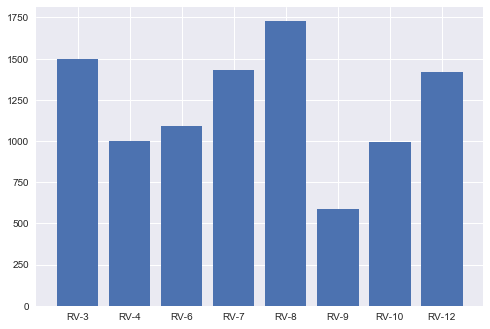

In [54]:
med3 = rv3['flight_hours'].median()
med4 = rv4['flight_hours'].median()
med6 = rv6['flight_hours'].median()
med7 = rv7['flight_hours'].median()
med8 = rv8['flight_hours'].median()
med9 = rv9['flight_hours'].median()
med10 = rv10['flight_hours'].median()
med12 =rv12['flight_hours'].median()
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
meds = [med3, med4, med6, med7, med8, med9, med10, med12]
plt.bar(names, meds)
plt.show()

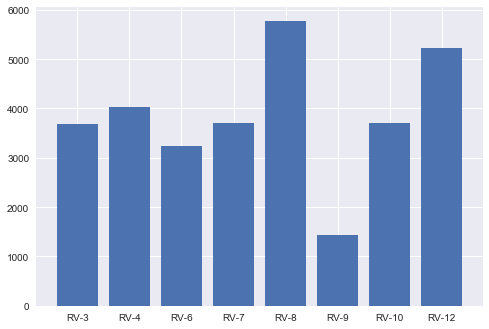

In [55]:
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
avg3 = rv3['flight_hours'].mean()
avg4 = rv4['flight_hours'].mean()
avg6 = rv6['flight_hours'].mean()
avg7 = rv7['flight_hours'].mean()
avg8 = rv8['flight_hours'].mean()
avg9 = rv9['flight_hours'].mean()
avg10 = rv10['flight_hours'].mean()
avg12 = rv12['flight_hours'].mean()
avgs = [avg3, avg4, avg6, avg7, avg8, avg9, avg10, avg12]
plt.bar(names, avgs)
plt.show()

In [56]:
rv6a_filter = vans_df['acft_model'].str.contains(pat='6A')
print(rv6a_filter)

0      False
1      False
2      False
3      False
4       True
       ...  
775    False
776    False
777    False
778    False
779    False
Name: acft_model, Length: 780, dtype: bool


In [57]:
rv6 = vans_df[vans_df['acft_model'].str.contains(pat='6')]
rv6a = rv6[rv6['acft_model'].str.contains(pat='6A')]
rv6 = rv6[~rv6['acft_model'].str.contains(pat='6A')]

In [58]:
rv6a

,acft_model,flight_hours
4,RV6A,1510.0
15,Vans RV-6A,3586.0
18,RV-6A,326.0
24,RV6A,627.0
25,RV-6A,1706.0
...,...,...
740,RV-6A,872.0
741,RV-6A,529.0
744,VANS RV6A,172.0
747,RV-6A,1798.0


In [78]:
findings_df = pd.read_csv('data/Findings.csv')
findings_df = findings_df[findings_df['finding_description'].str.strip().str.contains(pat='Aircraft-Aircraft oper/perf/capability-Performance/control' y)][['ev_id']]
findings_df[findings_df['finding_description'].str.strip().str.contains(pat='Aircraft-Aircraft oper/perf/capability-Performance/control' y)][['finding_description']]
for entry in findings_df['finding_description'].unique():
    print(entry)

Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Pitch control-Not attained/maintained - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Descent rate-Incorrect use/operation - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Directional control-Not attained/maintained - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Configuration-Incorrect use/operation - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Descent/approach/glide path-Not attained/maintained - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Landing flare-Incorrect use/operation - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Engine out control-Not attained/maintained - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-(general)-Not attained/maintained - C
Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Angle of attac